In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from keras import backend as K
from tensorflow import keras

import numpy as np
import os

from matplotlib import pyplot as plt

In [6]:
model = keras.models.load_model("models/new_arch/chb02_threshold_0.887_false_neg_0_true_neg_3115_false_pos_364_true_pos_39_accuracy_90_regularised.h5")
ictal_data = np.load("ml_processed_balanced/chb02_16+.edf_data.npy")
ictal_labels = np.load("ml_processed_balanced/chb02_16+.edf_labels.npy")

ictal_true = ictal_data[120]
print(ictal_true.shape)
ictal_false = ictal_data[30]

(23, 256)


In [5]:
get_activations = K.function([model.layers[0].input], [model.layers[i].output for i in range(len(model.layers))])

In [24]:
from data import get_seizure_data

x = []
y = []
for file in os.listdir("graphs/new_arch/"):
    print(file)
    print(file.find("accuracy_"))
    accuracy_idx = file.find("accuracy_")
    value = f"{file[-18]}{file[-17]}"
    if value == "_8":
          value = "8"
    y.append(int(value))
    datas = get_seizure_data(file[0:5])
    case_seizure_count = 0
    for data in datas:
            case_seizure_count += data.seizure_count
    x.append(case_seizure_count)

chb01_threshold_0.301_false_neg_5_true_neg_1695_false_pos_1825_true_pos_34_accuracy_49_regularised.png
75
chb02_threshold_0.887_false_neg_0_true_neg_3115_false_pos_364_true_pos_39_accuracy_90_regularised.png
74
chb03_threshold_0.2_false_neg_2_true_neg_1459_false_pos_2049_true_pos_37_accuracy_42_regularised.png
73
chb05_threshold_0.991_false_neg_0_true_neg_2436_false_pos_1009_true_pos_39_accuracy_71_regularised.png
75
chb06_threshold_0.336_false_neg_1_true_neg_8368_false_pos_5973_true_pos_69_accuracy_59_regularised.png
75
chb08_threshold_0.941_false_neg_0_true_neg_2295_false_pos_1094_true_pos_39_accuracy_68_regularised.png
75
chb09_threshold_0.999_false_neg_0_true_neg_8309_false_pos_5986_true_pos_39_accuracy_58_regularised.png
75
chb10_threshold_0.365_false_neg_1_true_neg_4164_false_pos_2961_true_pos_38_accuracy_59_regularised.png
75
chb10_threshold_0.532_false_neg_0_true_neg_3735_false_pos_3390_true_pos_39_accuracy_53_regularised.png
75
chb11_threshold_0.997_false_neg_0_true_neg_2646_f

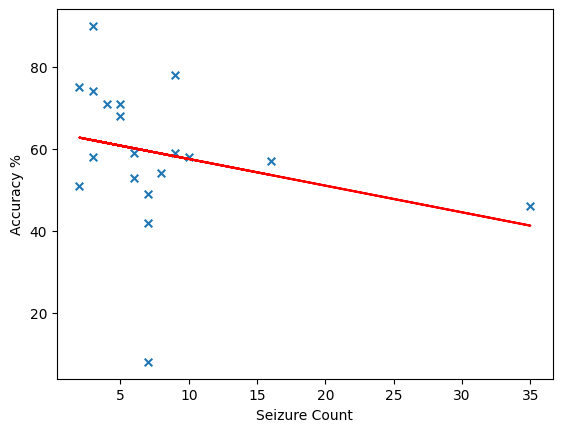

In [39]:
m, b = np.polyfit(x, y, 1)
plt.clf()
regression_line = [m * i + b for i in x]
plt.plot(x, regression_line, color="red")
plt.scatter(x, y, marker="x", s=30)


plt.xlabel("Seizure Count")
plt.ylabel("Accuracy %")
plt.show()